In [1]:
import numpy as np
import matplotlib.pyplot as plt

### $ \text{ReLU}(x) = (x)^+ = \max(0, x)$

In [2]:
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

In [3]:
class ManualReLUNet:
    def __init__(self, input_size, hidden_size, output_size, lr=0.01):
        # Inicializa pesos e vieses de forma aleatória
        self.W1 = np.random.randn(hidden_size, input_size)
        self.b1 = np.random.randn(hidden_size, 1)
        self.W2 = np.random.randn(output_size, hidden_size)
        self.b2 = np.random.randn(output_size, 1)
        self.lr = lr

    def forward(self, x):
        """
        x: entrada com shape (input_size, número de amostras)
        """
        self.Z1 = np.dot(self.W1, x) + self.b1       # Pré-ativação da camada oculta
        self.A1 = relu(self.Z1)                        # Ativação ReLU na camada oculta
        self.Z2 = np.dot(self.W2, self.A1) + self.b2    # Pré-ativação da camada de saída
        self.A2 = relu(self.Z2)                        # Ativação ReLU na saída
        return self.A2

    def backward(self, x, y, output):
        """
        Realiza o backpropagation utilizando a derivada da função ReLU.
        x: entrada, y: saída desejada, output: saída calculada
        """
        m = x.shape[1]  # número de amostras

        # Cálculo do erro e gradiente na camada de saída
        dZ2 = (output - y) * relu_derivative(self.Z2)
        dW2 = (1/m) * np.dot(dZ2, self.A1.T)
        db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)

        # Propagação do erro para a camada oculta
        dA1 = np.dot(self.W2.T, dZ2)
        dZ1 = dA1 * relu_derivative(self.Z1)
        dW1 = (1/m) * np.dot(dZ1, x.T)
        db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)

        # Atualização dos parâmetros com Gradient Descent
        self.W2 -= self.lr * dW2
        self.b2 -= self.lr * db2
        self.W1 -= self.lr * dW1
        self.b1 -= self.lr * db1

    def train(self, X, Y, epochs=1000):
        loss_history = []
        for epoch in range(epochs):
            output = self.forward(X)
            loss = np.mean((output - Y) ** 2)
            loss_history.append(loss)
            self.backward(X, Y, output)
            if epoch % 100 == 0:
                print(f'Epoch {epoch}, Loss: {loss}')
        return loss_history

In [16]:
# Configuração dos dados e hiperparâmetros
np.random.seed(42)
input_size = 2
hidden_size = 3
output_size = 2

# Criando 10 amostras de entrada aleatórias
X = np.random.randn(input_size, 10)
# Saída desejada: aplicação da função ReLU na entrada
Y = np.maximum(0, X)

# Instancia e treina a rede
net = ManualReLUNet(input_size, hidden_size, output_size, lr=0.01)
loss_history = net.train(X, Y, epochs=1000)

Epoch 0, Loss: 0.319338010962511
Epoch 100, Loss: 0.3188284730607938
Epoch 200, Loss: 0.31855203105051644
Epoch 300, Loss: 0.3184004784661581
Epoch 400, Loss: 0.3183160569825002
Epoch 500, Loss: 0.31826787454973404
Epoch 600, Loss: 0.31823938141222996
Epoch 700, Loss: 0.3182216951740389
Epoch 800, Loss: 0.31821003639880163
Epoch 900, Loss: 0.3182018231610422


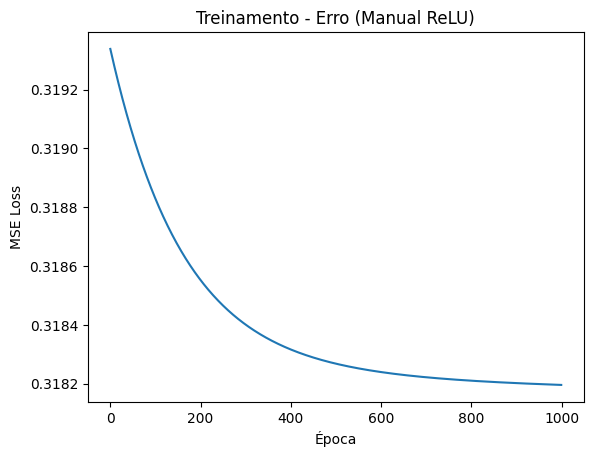

In [17]:
# Visualiza a evolução do erro
plt.plot(loss_history)
plt.xlabel('Época')
plt.ylabel('MSE Loss')
plt.title('Treinamento - Erro (Manual ReLU)')
plt.show()

## Implementação com PyTorch e Visualização

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [6]:
# Define a arquitetura da rede utilizando PyTorch
class PyTorchReLUNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(PyTorchReLUNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        return x

In [7]:
# Parâmetros da rede
input_size = 1
hidden_size = 2
output_size = 1

In [8]:
# Preparando os0 1 2 2 dados
torch.manual_seed(42)
# 10 amostras de entrada
X_torch = torch.randn(10, input_size)
# Saída desejada: aplicação da função ReLU na entrada
Y_torch = torch.relu(X_torch)

In [9]:
# Instanciando a rede, definindo função de perda e otimizador
model = PyTorchReLUNet(input_size, hidden_size, output_size)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [10]:
# Treinamento com registro da evolução do erro
epochs = 1000
loss_history = []
for epoch in range(epochs):
    optimizer.zero_grad()
    output = model(X_torch)
    loss = criterion(output, Y_torch)
    loss_history.append(loss.item())
    loss.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

Epoch 0, Loss: 0.5398735404014587
Epoch 100, Loss: 0.5398735404014587
Epoch 200, Loss: 0.5398735404014587
Epoch 300, Loss: 0.5398735404014587
Epoch 400, Loss: 0.5398735404014587
Epoch 500, Loss: 0.5398735404014587
Epoch 600, Loss: 0.5398735404014587
Epoch 700, Loss: 0.5398735404014587
Epoch 800, Loss: 0.5398735404014587
Epoch 900, Loss: 0.5398735404014587


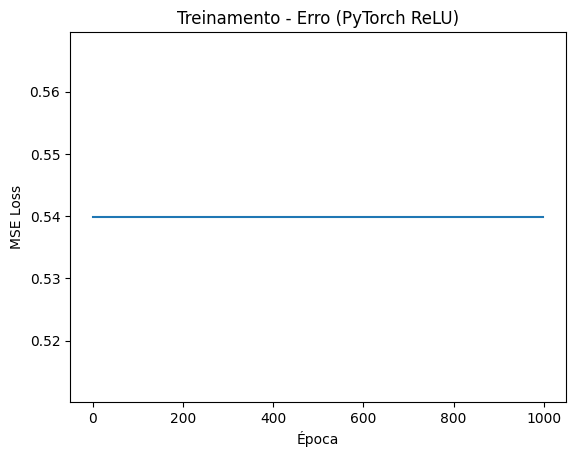

In [11]:
# Visualiza a evolução do erro
plt.plot(loss_history)
plt.xlabel('Época')
plt.ylabel('MSE Loss')
plt.title('Treinamento - Erro (PyTorch ReLU)')
plt.show()